Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: colorspace

Loading required package: khroma

Loading required package: ggplot2

Loading required package: ggpattern

Loading required package: reshape2

Loading required package: tidyverse

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::f

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

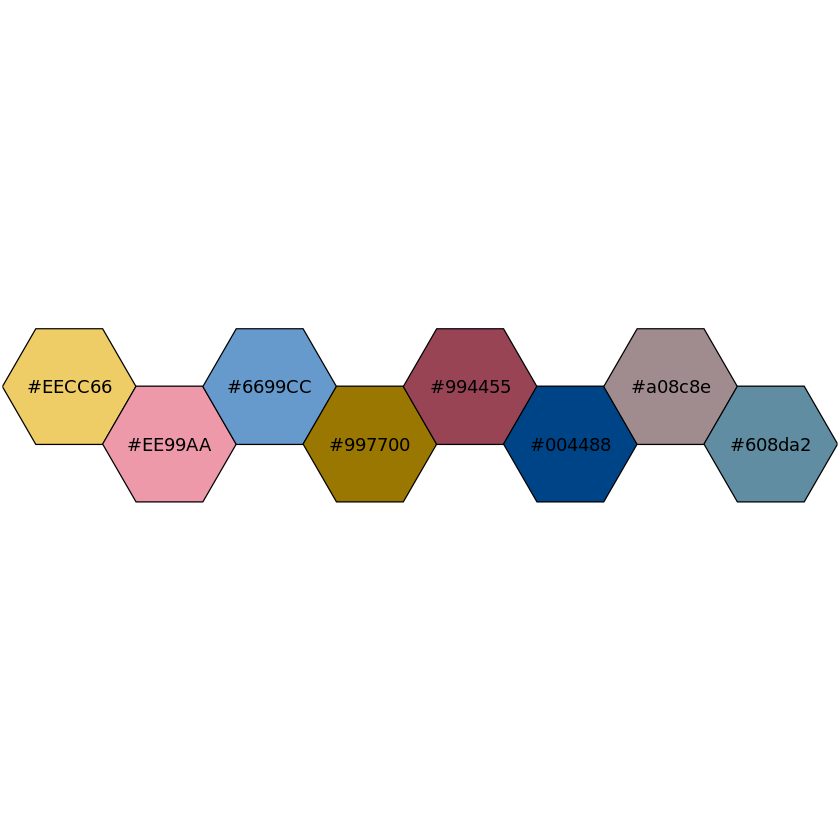

In [1]:
f_func <- "../functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))
f_path <- "../dirs.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_path, '--to=script', '--stdout'), stdout = TRUE)))
f_cols <- "../cols.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_cols, '--to=script', '--stdout'), stdout = TRUE)))

In [2]:
Asp_names <- list()
Karius_Asp_list <- read.csv(Karius_AL, header = FALSE)
Asp_names[["Karius"]] <- as.character(Karius_Asp_list$V1)

for (db in dbs_sel_min){
    tmp <- read.csv(paste0(DB_DIR, db, "_inspect.txt"), header = FALSE, sep = "\t")
    if(db == "RS"){db <- "uR.7"}
    if(db == "EPRSc2"){db <- "cRE.21"}
    if(db == "EPRSFv64MCAspDM"){db <- "dREM.260"}
    Asp_names[[db]] <- unique(str_trim(tmp$V6[which(tmp$V4 == "S" & 
                                   grepl(tmp$V6, pattern = "Aspergillus") & 
                                   !grepl(tmp$V6, pattern = "virus"))], side = "left"))
}

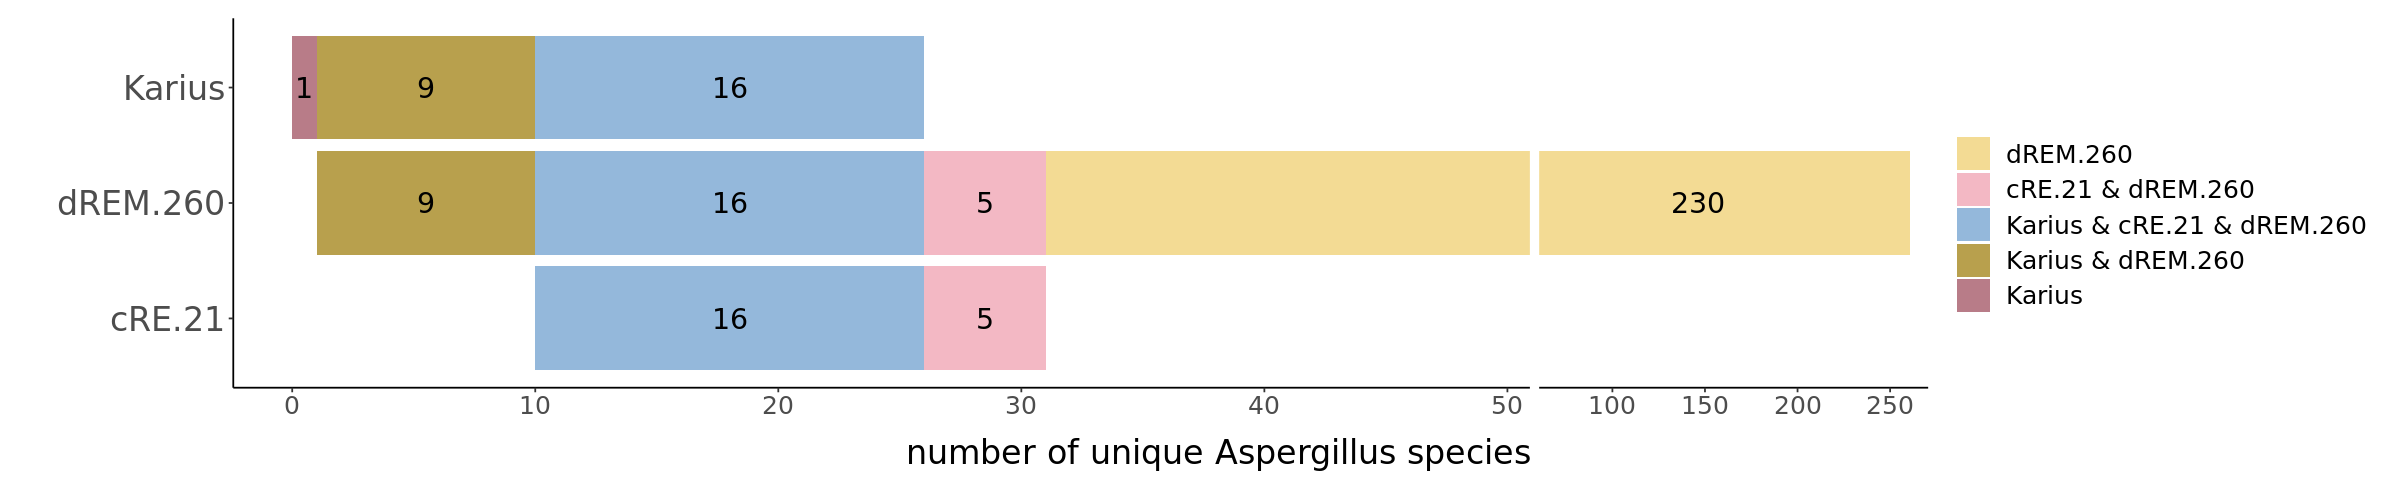

In [4]:
ItemsList <- venn(Asp_names, show.plot = FALSE)
ItemValues <- lengths(attributes(ItemsList)$intersections)
data <- NULL
for (i in 1:length(ItemValues)){
    database = unlist(str_split(names(ItemValues)[i], pattern = ":"))
    condition = rep(names(ItemValues)[i],times = length(database))
    value = rep(as.numeric(ItemValues[i]),times = length(database))
    tmp_data <- data.frame("database" = database,"condition" = condition,"value" = value)
    if(!exists('data')){data <- tmp_data}else{data=rbind(data, tmp_data)}
}
data = rbind(data,
             data[which(data$condition == "Karius")[1],] %>% 
                mutate(database = "cRE.21") %>% mutate(condition = NA) %>% mutate(value = value +9),
             data[which(data$condition == "Karius")[1],] %>% 
                mutate(database = "dREM.260") %>% mutate(condition = NA)) %>% 
            mutate(condition = gsub(condition, pattern = ":", replacement = " & ")) %>% 
            mutate(condition = factor(condition, levels = 
                                     gsub(rev(c(NA, "Karius", "Karius:dREM.260", "Karius:cRE.21:dREM.260", 
                                         "cRE.21:dREM.260", "dREM.260")), pattern = ":", replacement = " & "))) %>% 
            mutate(col_set = ifelse(is.na(condition), yes = NA, no = "yes")) 

plot_vennLike <- ggplot(data, aes(fill=condition, y=database, x=value)) + 
    geom_bar(position="stack", stat="identity") + 
    geom_text(aes(label = value, color = col_set), size = 6, position = position_stack(vjust = 0.5)) + 
    scale_fill_manual(values = alpha(c(colors_mc), alpha = 0.7), na.value = NA, na.translate=FALSE) + 
    scale_color_manual(values = "black", na.value = NA) + 
    scale_x_break(c(48.5,70), scales = 0.3) + 
    theme_classic()+
    theme(legend.position = "right") + xlab("number of unique Aspergillus species")

options(repr.plot.width=20, repr.plot.height=4)
SuplFig16 <- plot_vennLike + 
    theme(legend.position='right', legend.justification='bottom', legend.direction = 'vertical',
        axis.text.x = element_text(size = 15), 
        legend.key.size = unit(0.75, 'cm'), legend.key.height = unit(0.75, 'cm'), legend.key.width = unit(0.75, 'cm'), 
        text = element_text(size = 17), 
        legend.title = element_text(size = 18), legend.text = element_text(size = 15, colour = "black"),
        plot.title = element_text(size = 20, hjust = 0.5, face = "bold"), 
        plot.subtitle = element_text(size = 17, hjust = 0.5), 
        plot.tag = element_text(face = 'bold', size = 20),  
        strip.background = element_blank(), axis.title.x = element_text(size = 20), axis.text = element_text(size = 20)) + guides(col = "none") + 
        labs(fill = "") + ylab("")

SuplFig16

ggsave("../../output/suppl_figures/SuplFig16_R.png", 
       SuplFig16, width = 20, height = 4)
ggsave("../../output/suppl_figures/SuplFig16_R.pdf", 
       SuplFig16, width = 20, height = 4)